PCA & t-SNE

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['image.cmap'] = 'gray'
# 경고창 피하는 코드
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)

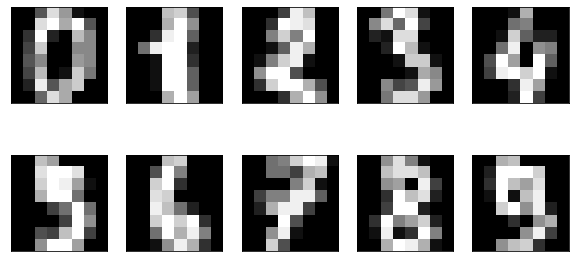

In [2]:
digits = load_digits()
fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                         subplot_kw={'xticks':(), 'yticks':()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

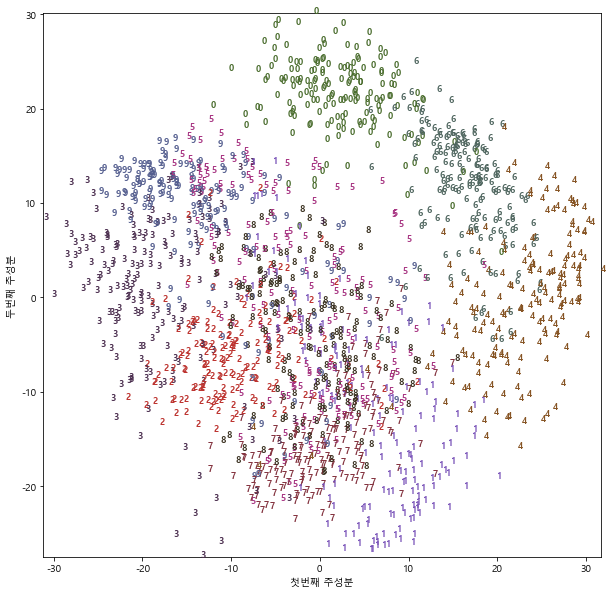

In [3]:
#PCA
#학습
pca = PCA(n_components=2)
pca.fit(digits.data)
#변환
digit_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120","#535D8E"]
plt.figure(figsize=(10,10))
plt.xlim(digit_pca[:,0].min(), digit_pca[:,0].max())
plt.ylim(digit_pca[:,1].min(), digit_pca[:,1].max())

for i in range(len(digits.data)) :
    plt.text(digit_pca[i,0], digit_pca[i,1], str(digits.target[i]),
            color = colors[digits.target[i]],
            fontdict={'weight':'bold','size':9})
plt.xlabel('첫번째 주성분')
plt.ylabel('두번째 주성분')
plt.show()

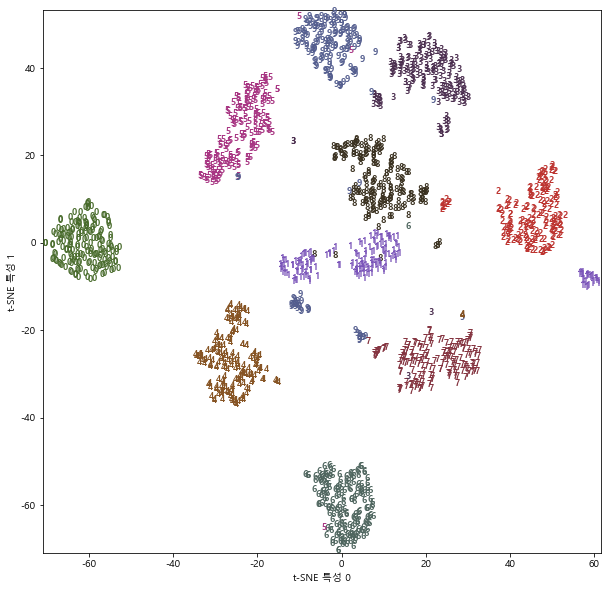

In [4]:
#학습, 변환
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
digits_tsne = tsne.fit_transform(digits.data)

plt.figure(figsize=(10,10))
plt.xlim(digits_tsne[:,0].min(),digits_tsne[:,0].max()+1)
plt.ylim(digits_tsne[:,1].min(),digits_tsne[:,1].max()+1)

for i in range(len(digits.data)):
    plt.text(digits_tsne[i,0], digits_tsne[i, 1], str(digits.target[i]),
            color = colors[digits.target[i]],
            fontdict= {'weight':'bold', 'size':9})
plt.xlabel('t-SNE 특성 0')
plt.ylabel('t-SNE 특성 1')
plt.show()

### t-SNE

In [5]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['image.cmap'] = 'gray'
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)

In [6]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
train_df = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
              'petal width (cm)']]
#학습, 변환
tsne = TSNE(n_components=2)
tsne_np = tsne.fit_transform(train_df)
#데이터프레임화
tsne_df = pd.DataFrame(tsne_np, columns=['component 0', 'component 1'])
tsne_df.head()

,component 0,component 1
0,21.293177,9.001395
1,23.758654,9.411333
2,23.979006,8.365572
3,24.254871,8.563942
4,21.224253,9.373979


### t-SNE 2차원 데이터 시각화

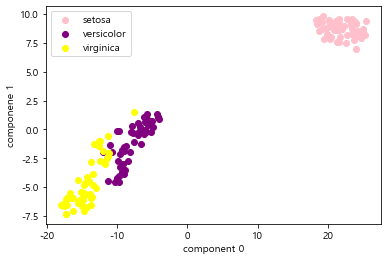

In [7]:
tsne_df['target'] = df['target']

#target별 분리
tsne_df_0 = tsne_df[tsne_df['target']==0]
tsne_df_1 = tsne_df[tsne_df['target']==1]
tsne_df_2 = tsne_df[tsne_df['target']==2]

#target별 2차원시각화
plt.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'], color='pink',
            label='setosa')
plt.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'], color='purple',
            label='versicolor')
plt.scatter(tsne_df_2['component 0'], tsne_df_2['component 1'], color='yellow',
            label='virginica')
plt.xlabel('component 0')
plt.ylabel('componene 1')
plt.legend()
plt.show()

2차원 공간에 꽃 종류별로 구분이 잘 되어 임베딩 됨

### 3차원 시각화

In [8]:
#3차원 학습, 변환
tsne = TSNE(n_components=3)
tsne_np = tsne.fit_transform(train_df)

#데이터 프레임화
tsne_df = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1',
                                          'component 2'])
#컬럼 추가
tsne_df['target'] = df['target']
tsne_df.head()

,component 0,component 1,component 2,target
0,4.370893,14.741072,142.395905,0
1,130.963821,35.030178,-62.179592,0
2,29.361237,106.874817,44.554504,0
3,72.204201,108.219940,-14.477965,0
4,32.539494,46.263256,139.602112,0


In [9]:
#3차원 라이브러리
from mpl_toolkits.mplot3d import Axes3D

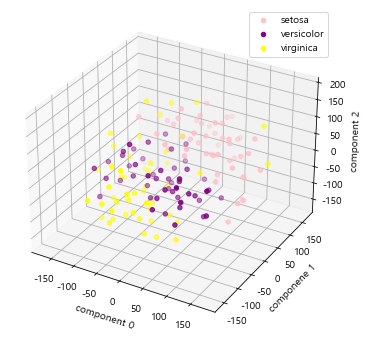

In [10]:
#3차원 그래프 세팅
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')

#target별 분리
tsne_df_0 = tsne_df[tsne_df['target']==0]
tsne_df_1 = tsne_df[tsne_df['target']==1]
tsne_df_2 = tsne_df[tsne_df['target']==2]

#target별 3차원시각화
ax.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'],
          tsne_df_0['component 2'], color='pink', label='setosa')
ax.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'],
          tsne_df_1['component 2'], color='purple', label='versicolor')
ax.scatter(tsne_df_2['component 0'], tsne_df_2['component 1'],
          tsne_df_2['component 2'], color='yellow', label='virginica')
ax.set_xlabel('component 0')
ax.set_ylabel('componene 1')
ax.set_zlabel('component 2')
ax.legend()
plt.show()

### 차원축소의 장단점

##### 장점
- 데이터의 독립변수 간 다중공산성 해결 가능
- 많은 양의 정보를 효과적으로 시각화해서 데이터의 특성 탐색 가능
- 연산 속도 향상

##### 단점
- 정보 손실이 발생
- 원본 데이터 대비 데이터를 해석하는데 어려움이 있음

### 군집분석 = 클러스터링

#### KMeans

In [11]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import mglearn
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['image.cmap'] = 'gray'
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)

In [13]:
x, y = make_blobs(random_state=0)
kmeans = KMeans(n_clusters=3)
#학습
kmeans.fit(x)

KMeans(n_clusters=3)

In [28]:
#예측값
print(kmeans.predict(x))

[1 0 1 2 2 0 2 2 1 0 0 0 1 0 2 1 2 2 2 2 2 2 2 2 1 1 1 1 2 2 0 1 1 0 2 0 0
 1 1 2 2 1 1 0 0 0 1 1 2 2 0 1 0 1 2 2 1 1 0 1 1 2 2 2 2 1 0 2 1 0 2 1 2 1
 0 0 0 0 2 1 0 0 1 0 0 0 0 0 1 0 1 1 2 2 2 2 0 0 2 2]


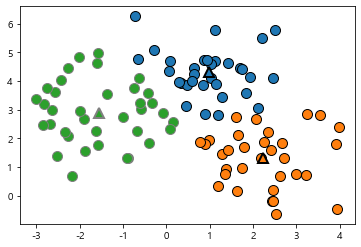

In [31]:
#시각화
mglearn.discrete_scatter(x[:,0], x[:,1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0],
                         kmeans.cluster_centers_[:,1], [0,1,2],
                         markers='^', markeredgewidth=2)
plt.show()

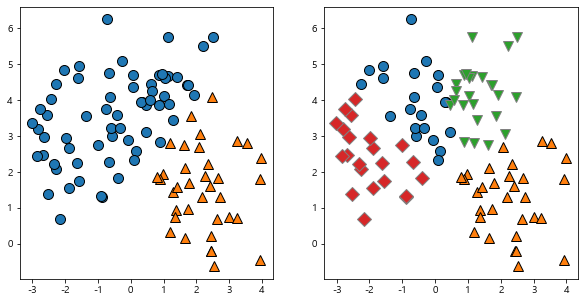

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

#2개
kmeans = KMeans(n_clusters=2)
kmeans.fit(x)
a = kmeans.labels_

mglearn.discrete_scatter(x[:,0], x[:,1], a, ax=axes[0])

#4개
kmeans = KMeans(n_clusters=4)
kmeans.fit(x)
a = kmeans.labels_

mglearn.discrete_scatter(x[:,0], x[:,1], a, ax=axes[1])
plt.show()

#### K-Means 실패 사례

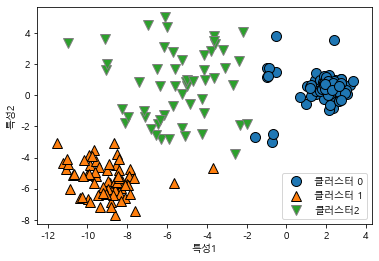

In [40]:
x, y = make_blobs(n_samples=200,
                  cluster_std=[1.0, 2.5, 0.5],
                  random_state=170)

kmeans = KMeans(n_clusters=3, random_state=0)
#학습
kmeans.fit(x)
pred = kmeans.predict(x)

#시각화
mglearn.discrete_scatter(x[:,0], x[:,1], pred)
plt.legend(['클러스터 0', '클러스터 1', '클러스터2'], loc='best')
plt.xlabel('특성1')
plt.ylabel('특성2')
plt.show()

#### 실패 사례2

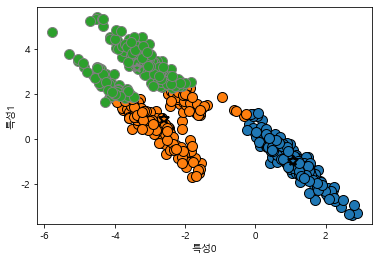

In [42]:
#데이터 만들기
x, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

#데이터가 길게 늘어지도록 변경
trainsformation = rng.normal(size=(2,2))
x = np.dot(x, trainsformation)

#KMeans 학습
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
pred = kmeans.predict(x)

#시각화
mglearn.discrete_scatter(x[:,0], x[:,1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0],
                         kmeans.cluster_centers_[:,1], [0, 1, 2],
                         markers='*', markeredgewidth=2)
plt.xlabel('특성0')
plt.ylabel('특성1')
plt.show()

#### 실패사례3

In [43]:
from sklearn.datasets import make_moons
x, y = make_moons(n_samples=200, noise=0.05, random_state=0)

Text(0, 0.5, '특성1')

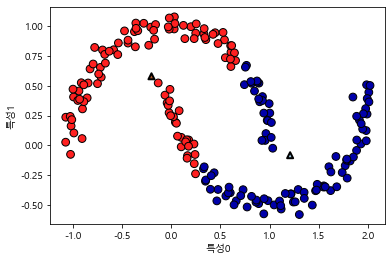

In [46]:
#학습, 예측
kmeans = KMeans(n_clusters=2)
kmeans.fit(x)
pred = kmeans.predict(x)

#시각화
plt.scatter(x[:,0], x[:,1], c=pred, cmap=mglearn.cm2, s=60, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker='^', c=range(kmeans.n_clusters), linewidths=2, cmap='Paired',
            edgecolors='k')
plt.xlabel('특성0')
plt.ylabel('특성1')
plt.show()

### 계층적 군집분석

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering #계층적 군집분석
from sklearn.preprocessing import StandardScaler
import mglearn
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)

In [47]:
from scipy.cluster.hierarchy import dendrogram, ward, linkage

In [49]:
x, y = make_blobs(random_state=1)
agg = AgglomerativeClustering(n_clusters=3)
a = agg.fit_predict(x)

NameError: name 'AgglomerativeClustering' is not defined